In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.special import erfinv

plt.rc("text", usetex=True)

In [2]:
def pearson(x, y):
    return np.corrcoef(x, y)[0, 1]

def regline(x, y):
    reg = linregress(x, y)
    return x, reg.intercept + reg.slope*x

## Without outlier

In [3]:
rho = 0.5
mu = np.zeros(2)
sigma = np.array([[1, rho], [rho, 1]])
n_samples = 20

In [4]:
data = np.random.multivariate_normal(mu, sigma, size=n_samples)
x, y = data[:, 0], data[:, 1]

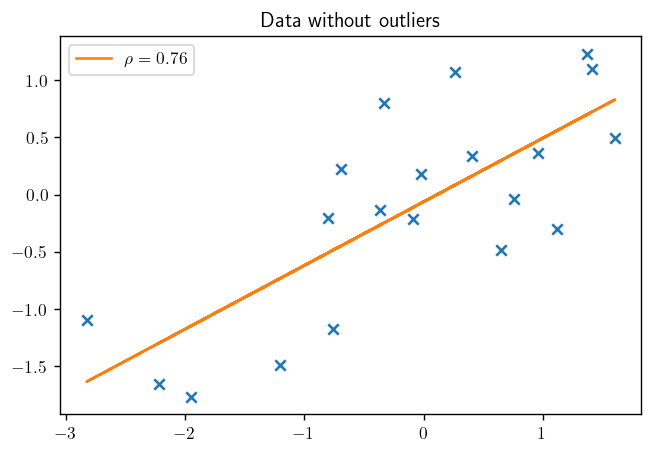

In [5]:
rho = pearson(x, y)

plt.figure(dpi=125)
plt.scatter(x, y, marker="x")
plt.plot(*regline(x, y), label=f"$\\rho={rho:.2f}$", color="tab:orange")
plt.title("Data without outliers")
plt.legend(loc="upper left")
plt.show()

## With outlier

In [6]:
data_out = np.row_stack((data, np.array([10, 10])))
x_out, y_out = data_out[:, 0], data_out[:, 1]

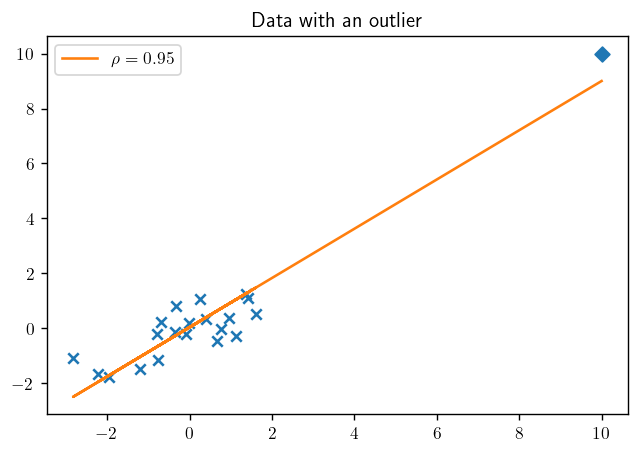

In [7]:
rho_out = pearson(x_out, y_out)

plt.figure(dpi=125)
plt.scatter(x_out[:-1], y_out[:-1], marker="x", color="tab:blue")
plt.scatter(x_out[-1], y_out[-1], marker="D", color="tab:blue")
plt.plot(*regline(x_out, y_out), label=f"$\\rho={rho_out:.2f}$", color="tab:orange")
plt.title("Data with an outlier")
plt.legend(loc="upper left")
plt.show()

## With outlier and reparametrization

In [8]:
def gaussianize(x):
    assert x.ndim == 1
    n = x.size
    order = np.argsort(np.argsort(x))
    r = np.arange(n) + 1
    return np.sqrt(2) * erfinv((2*r[order] - (n+1))/n)

def marginaly_gaussianize(x):
    assert x.ndim == 2
    return np.column_stack([
        gaussianize(x[:, i]) for i in range(x.shape[1])
    ])

In [9]:
data_reparam = marginaly_gaussianize(data_out)
x_reparam, y_reparam = data_reparam[:, 0], data_reparam[:, 1]

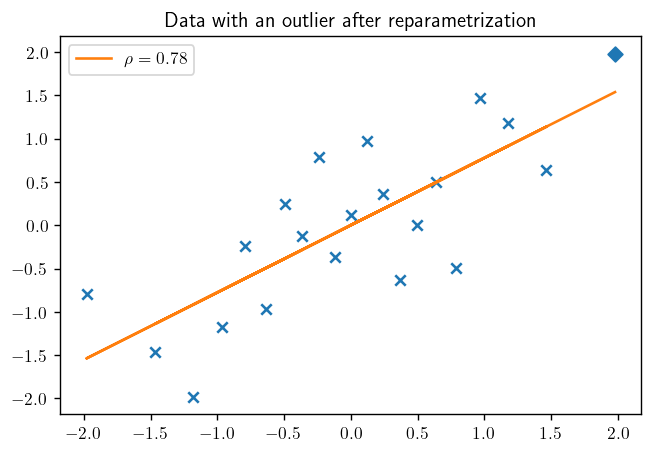

In [10]:
rho_reparam = pearson(x_reparam, y_reparam)

plt.figure(dpi=125)
plt.scatter(x_reparam[:-1], y_reparam[:-1], marker="x", color="tab:blue")
plt.scatter(x_reparam[-1], y_reparam[-1], marker="D", color="tab:blue")
plt.plot(*regline(x_reparam, y_reparam), label=f"$\\rho={rho_reparam:.2f}$", color="tab:orange")
plt.title("Data with an outlier after reparametrization")
plt.legend(loc="upper left")
plt.show()

## Interpretation

Pearson's linear correlation coefficient is sensitive to outliers. As it stands, line intensities have not been log-logged (this is something we used to do, but no longer do as it is complicated and unnecessary for calculating mutual information).

By reparametrizing, we actually give less weight to these values, and I have the feeling that we obtain a more "robust" correlation coefficient value.